In [60]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from matplotlib import pyplot as plt

(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


def sig(x):
    return 1 / (1+np.exp(-x))


def antisig(x):
    return np.log(-(x/(x-1)))


def show(sets, cols=16, rows=8, negate=False, cmap='gray'):
    fig = plt.figure(figsize=(cols, rows))
    gs = fig.add_gridspec(rows, cols, hspace=0, wspace=0)
    a = gs.subplots()
    a: list[plt.Axes] = a.flatten()
    toplot = 1 - sig(sets) if negate else sets
    for i in range(len(sets)):
        a[i].imshow(toplot[i], cmap=cmap)
        a[i].set_xticks([])
        a[i].set_yticks([])
    plt.show()


def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255., label


ds_train: tf.data.Dataset = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test: tf.data.Dataset = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)


In [61]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='linear')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
    # verbose=False
)


Epoch 1/20
469/469 [==============================] - 3s 3ms/step - loss: 0.3621 - sparse_categorical_accuracy: 0.8985 - val_loss: 0.1825 - val_sparse_categorical_accuracy: 0.9492
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1502 - sparse_categorical_accuracy: 0.9560 - val_loss: 0.1228 - val_sparse_categorical_accuracy: 0.9626
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1072 - sparse_categorical_accuracy: 0.9684 - val_loss: 0.1060 - val_sparse_categorical_accuracy: 0.9677
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0816 - sparse_categorical_accuracy: 0.9758 - val_loss: 0.0996 - val_sparse_categorical_accuracy: 0.9693
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0667 - sparse_categorical_accuracy: 0.9803 - val_loss: 0.0887 - val_sparse_categorical_accuracy: 0.9735
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0539 - sparse_categorica

In [49]:
weights_in: tf.Tensor = model.weights[0].value()
weights_in = np.array(weights_in).T
biases_in: tf.Tensor = model.weights[1].value()
biases_in = np.array(biases_in).T
weights_1: tf.Tensor = model.weights[2].value()
weights_1 = np.array(weights_1).T
biases_1: tf.Tensor = model.weights[3].value()
biases_1 = np.array(biases_1).T
weights_2: tf.Tensor = model.weights[4].value()
weights_2 = np.array(weights_2).T
biases_2: tf.Tensor = model.weights[5].value()
biases_2 = np.array(biases_2).T

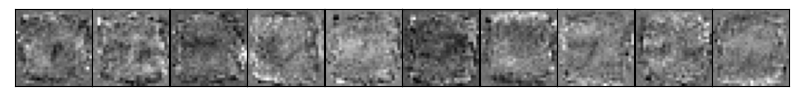

1/1 [==============================] - 0s 16ms/step


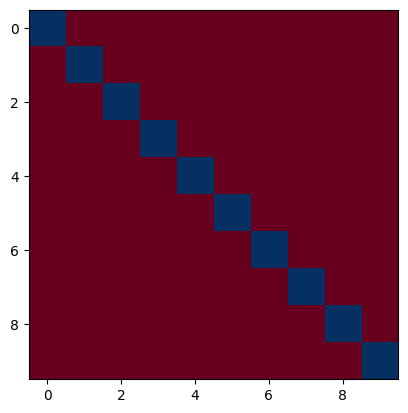

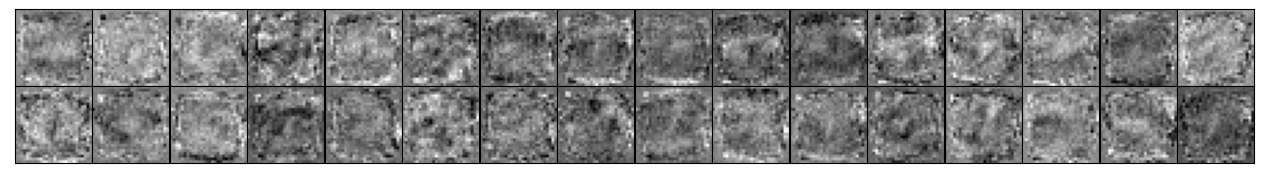

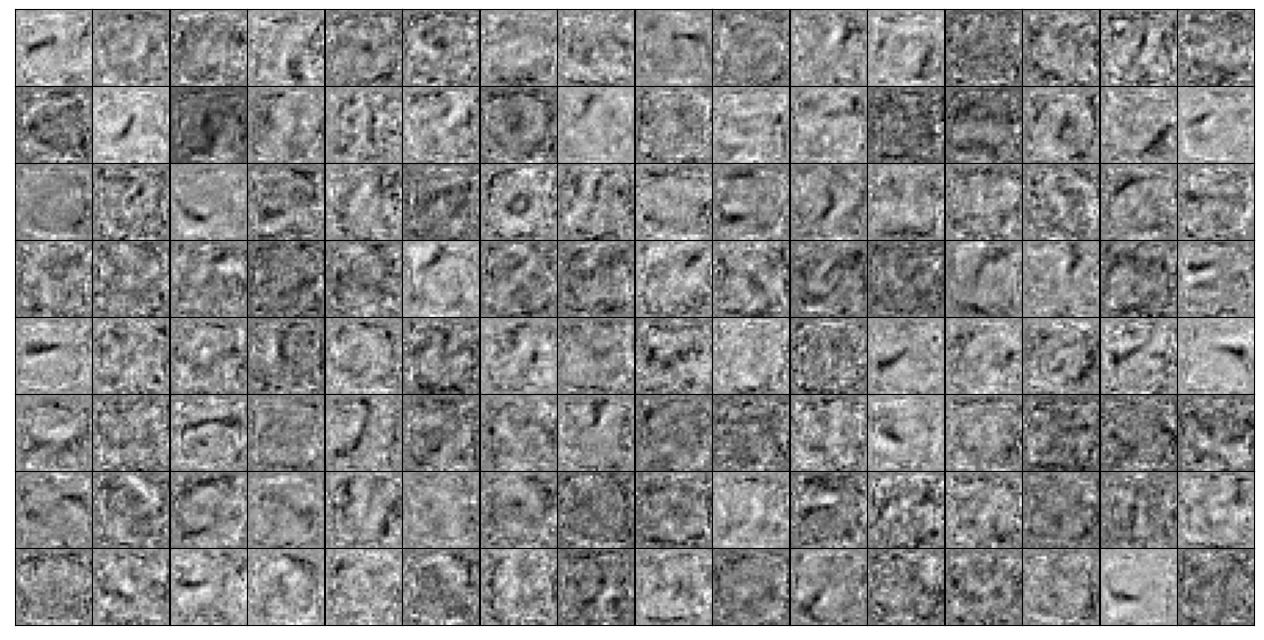

In [53]:
def relu_a(val):
    return np.maximum(np.zeros(val.shape),val)
# STRENGTH = 1
def showout(strengths=np.arange(0.2, 3, 0.2), polar=False, relu=False):
    multis = []
    for strength in strengths:
        lout_vals = np.eye(10, 10)
        if polar:
            lout_vals = lout_vals * 2 - 1
        lout_vals *= strength
        lout_sums = lout_vals - biases_2
        l2_significances = np.dot(lout_sums, weights_2) - biases_1
        l1_significances = np.dot(l2_significances, weights_1) - biases_in
        lin_significances = np.dot(l1_significances, weights_in)
        multis.extend(lin_significances)
        # shaped_ = np.array(lin_significances).reshape(len(lin_significances), 28, 28)
    multis = np.array(multis)
    if relu:
        multis = relu_a(multis)
    multis = multis.reshape(len(multis), 28, 28)
    show(multis, rows=int(len(multis)/10), cols=10)
    return multis


def show2(strengths=np.arange(0.2, 3, 0.2), polar=False, relu=False):
    multis = []
    for strength in strengths:
        l2_vals = np.eye(32, 32)
        if polar:
            l2_vals = l2_vals * 2 - 1
        l2_vals *= strength
        l2_sums = l2_vals - biases_1
        l1_significances = np.dot(l2_sums, weights_1) - biases_in
        lin_significances = np.dot(l1_significances, weights_in)
        multis.extend(lin_significances)
        # shaped_ = np.array(lin_significances).reshape(len(lin_significances), 28, 28)
    multis = np.array(multis)
    if relu:
        multis = relu_a(multis)
    multis = multis.reshape(len(multis), 28, 28)
    show(multis, rows=int(len(multis)/16), cols=16)

def show1(strengths=[1], polar=False, relu=False):
    multis = []
    for strength in strengths:
        l1_vals = np.eye(128, 128)
        if polar:
            l1_vals = l1_vals * 2 - 1
        l1_vals *= strength
        l1_sums = l1_vals - biases_in
        lin_significances = np.dot(l1_sums, weights_in)
        multis.extend(lin_significances)
        # shaped_ = np.array(lin_significances).reshape(len(lin_significances), 28, 28)
    multis = np.array(multis)
    if relu:
        multis = relu_a(multis)
    multis = multis.reshape(len(multis), 28, 28)
    show(multis, rows=int(len(multis)/16), cols=16)


# back_inputs = showout([1], True)
# preds = model.predict(back_inputs)
# plt.imshow(preds, cmap="RdBu")
# plt.show()
back_inputs = showout([10000])
preds = model.predict(back_inputs)
plt.imshow(tf.nn.softmax(preds), cmap="RdBu")
plt.show()
show2([1000])
show1([120])

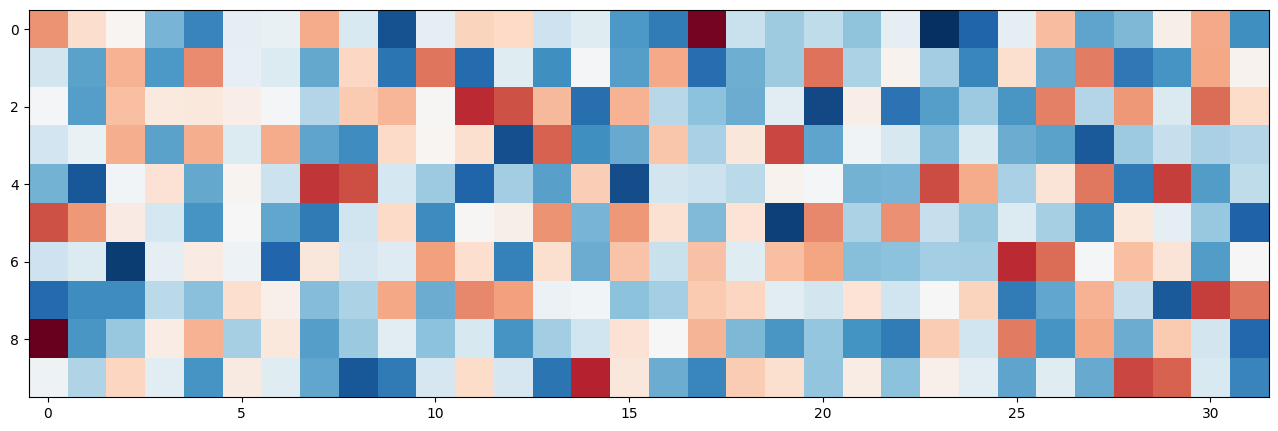

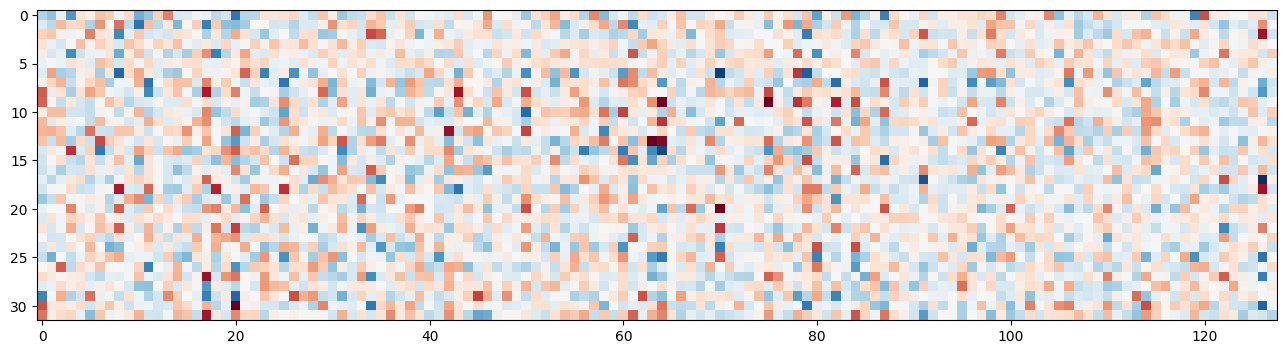

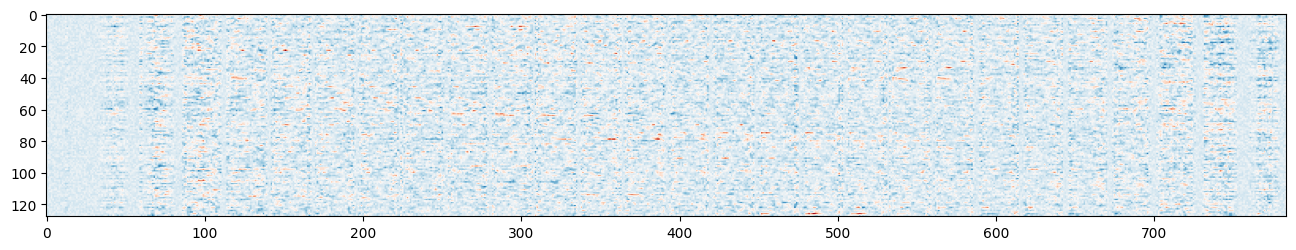

In [57]:

plt.figure(figsize=(16,8))
# plt.plot(np.abs(weights_in.sum(axis=1)))
plt.imshow(weights_2, cmap='RdBu')
plt.show()
plt.figure(figsize=(16,8))
# plt.plot(np.abs(weights_in.sum(axis=1)))
plt.imshow(weights_1, cmap='RdBu')
plt.show()
plt.figure(figsize=(16,8))
# plt.plot(np.abs(weights_in.sum(axis=1)))
plt.imshow(weights_in, cmap='RdBu')
plt.show()
